# Australian House price prediction


In [234]:
# Import all libaries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### STEP1: load Dataset

In [235]:
# load the dataset

hdata = pd.read_csv('train.csv')
hdata.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [236]:
# Number of rows and columns in the dataset
# There are 1460 rows and 81 columns (features)
hdata.shape

(1460, 81)

In [237]:
# feature names in the data
hdata.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [238]:
hdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

There are few columns in the data like Alley, FireplaceQu, PoolQC, Fence & MiscFeature. These have many NAs however referring to the data dictionary it is very clear that these are not NULL values but are one of the types in the feature.

Hence these cannot be considered as Missing values. 

In [239]:
hdata.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [240]:
# Percentage of Null values in the dataset

(round(100*(hdata.isnull().sum()/len(hdata.index)),2))

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF   

### Step2: Data inspection and cleanup

In [241]:
pd.set_option('display.max_rows', None)  # Option to display all the rows in the output

In [242]:
(round(100*(hdata.isnull().sum()/len(hdata.index)),2)).to_frame('Nulls').sort_values(by='Nulls' , ascending=False)

,Nulls
PoolQC,99.52
MiscFeature,96.30
Alley,93.77
Fence,80.75
FireplaceQu,47.26
LotFrontage,17.74
GarageYrBlt,5.55
GarageCond,5.55
GarageType,5.55
GarageFinish,5.55


###Check unique values in certain colums

In [243]:
hdata['Street'].value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [244]:
hdata['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [245]:
hdata['Utilities'].value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [246]:
hdata['Condition2'].value_counts()

Norm      1445
Feedr        6
PosN         2
RRNn         2
Artery       2
RRAn         1
RRAe         1
PosA         1
Name: Condition2, dtype: int64

In [247]:
hdata['HouseStyle'].value_counts()

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

In [248]:
hdata['RoofMatl'].value_counts()

CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Roll          1
Membran       1
Metal         1
ClyTile       1
Name: RoofMatl, dtype: int64

In [249]:
hdata['Heating'].value_counts()

GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64

In [250]:
hdata['LowQualFinSF'].value_counts()

0      1434
80        3
360       2
528       1
53        1
120       1
144       1
156       1
205       1
232       1
234       1
371       1
572       1
390       1
392       1
397       1
420       1
473       1
479       1
481       1
513       1
514       1
515       1
384       1
Name: LowQualFinSF, dtype: int64

In [251]:
hdata['3SsnPorch'].value_counts()

0      1436
168       3
216       2
144       2
180       2
245       1
238       1
290       1
196       1
182       1
407       1
304       1
162       1
153       1
320       1
140       1
130       1
96        1
23        1
508       1
Name: 3SsnPorch, dtype: int64

In [252]:
hdata['PoolArea'].value_counts()

0      1453
738       1
648       1
576       1
555       1
519       1
512       1
480       1
Name: PoolArea, dtype: int64

In [253]:
hdata['PoolQC'].value_counts()

Gd    3
Fa    2
Ex    2
Name: PoolQC, dtype: int64


### The below features bring in very less variance in outcome as more than 97% values in these have the same value.
Hence dropping these features from the model

Id
Street 
Utilities
RoofMatl
Heating
LowQualFinSF
3SsnPorch
PoolArea
PoolQC

In [254]:
hdata.drop(['Id','Street','Utilities','RoofMatl','Heating','LowQualFinSF','3SsnPorch','PoolArea','PoolQC'],axis=1,inplace=True)

In [255]:
hdata.shape   # After dropping these columns we have 72 features now for further analysis

(1460, 72)

In [256]:
# We can see that LotFrontage column has 17.74% missing values
# Let's see the distribution of the value of the LotFrontage column
hdata['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

We can see that mean and median are almost same (70) for LotFrontage column. Let us impute the missing values for LotFrontage with median because the column may have few outliers.

In [257]:
# We can Impute missing values of LotFrontage with median
hdata.loc[np.isnan(hdata['LotFrontage']), 'LotFrontage'] = hdata['LotFrontage'].median()

In [258]:
hdata['LotFrontage'].describe()

count    1460.000000
mean       69.863699
std        22.027677
min        21.000000
25%        60.000000
50%        69.000000
75%        79.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [259]:
hdata['MiscFeature'].unique()

array([nan, 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

In [260]:
hdata['MiscFeature'].value_counts()

Shed    49
Othr     2
Gar2     2
TenC     1
Name: MiscFeature, dtype: int64

In [261]:
hdata['Alley'] = hdata['Alley'].replace(np.nan, 'No Alley')
hdata['BsmtQual'] = hdata['BsmtQual'].replace(np.nan, 'No Basement')
hdata['BsmtCond'] = hdata['BsmtCond'].replace(np.nan, 'No Basement')
hdata['BsmtExposure'] = hdata['BsmtExposure'].replace(np.nan, 'No Basement')
hdata['BsmtFinType1'] = hdata['BsmtFinType1'].replace(np.nan, 'No Basement')
hdata['BsmtFinType2'] = hdata['BsmtFinType2'].replace(np.nan, 'No Basement')
hdata['FireplaceQu'] = hdata['FireplaceQu'].replace(np.nan, 'No Fireplace')
hdata['GarageType'] = hdata['GarageType'].replace(np.nan, 'No Garage')
hdata['GarageFinish'] = hdata['GarageFinish'].replace(np.nan, 'No Garage')
hdata['GarageQual'] = hdata['GarageQual'].replace(np.nan, 'No Garage')
hdata['GarageCond'] = hdata['GarageCond'].replace(np.nan, 'No Garage')
#hdata['PoolQC'] = hdata['PoolQC'].replace(np.nan, 'No Pool')
hdata['Fence'] = hdata['Fence'].replace(np.nan, 'No Fence')
hdata['MiscFeature'] = hdata['MiscFeature'].replace(np.nan, 'No MiscFeature')

## Check for NULL values again 

In [262]:
(round(100*(hdata.isnull().sum()/len(hdata.index)),2)).to_frame('Nulls').sort_values(by='Nulls' , ascending=False)

,Nulls
GarageYrBlt,5.55
MasVnrType,0.55
MasVnrArea,0.55
Electrical,0.07
KitchenQual,0.00
GarageType,0.00
FireplaceQu,0.00
Fireplaces,0.00
Functional,0.00
TotRmsAbvGrd,0.00


### 4 columns with Null values left for Imputation

GarageYrBlt	5.55

MasVnrType	0.55

MasVnrArea	0.55

Electrical	0.07


In [263]:
hdata['GarageYrBlt'].describe()  # check the GarageYrBlt column stats

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [264]:
# Imputing GarageYrBlt with Median value as mean and median are almost same. It will not introduce any bias to the model.
hdata.loc[np.isnan(hdata['GarageYrBlt']), 'GarageYrBlt'] = hdata['GarageYrBlt'].median()

In [265]:
#Check the observations in MasVnrType column
hdata['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [266]:
#Check the observations in MasVnrArea column
hdata['MasVnrArea'].describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

We can see Mean is 103, Median is 0, high standard deviation. hence imputing any value may cause issues and introduce some bias. Hence dropping the records for missing values in this column

The missing records for both the columns MasVnrType and MasVnrArea are the same. hence they will be dropped.

In [267]:
hdata['MasVnrArea'].isnull().sum()

8

In [268]:
# Deleting the rows for missing values in MasVnrArea
hdata = hdata[~np.isnan(hdata['MasVnrArea'])]

In [269]:
# Treating missing values for Electrical column
# Let us check the count for values in Electrical. SBrkr is the most common value occuring in the colum
hdata['Electrical'].value_counts()

SBrkr    1326
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [270]:
# Imputing Electrical column missing values with SBrkr
hdata.loc[pd.isnull(hdata['Electrical']), ['Electrical']] = 'SBrkr'

In [271]:
hdata['Electrical'].value_counts()

SBrkr    1327
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [272]:
#Final check on NULL values
(round(100*(hdata.isnull().sum()/len(hdata.index)),2)).to_frame('Nulls').sort_values(by='Nulls' , ascending=False)



,Nulls
MSSubClass,0.0
MSZoning,0.0
GarageType,0.0
FireplaceQu,0.0
Fireplaces,0.0
Functional,0.0
TotRmsAbvGrd,0.0
KitchenQual,0.0
KitchenAbvGr,0.0
BedroomAbvGr,0.0


NO missing values in any of the colums. So we now proceed with next step in model building.

Mapping Categorical values to numbers for model building

In [273]:
def funct_mapper(x):
    return x.map({'Typ': 7, "Min1": 6, "Min2": 5, "Mod": 4, "Maj1": 3, 'Maj2': 2, 'Sev': 1, 'Sal': 0})

def fence_mapper(x):
    return x.map({'GdPrv': 4, "MnPrv": 3, "GdWo": 2, "MnWw": 1, "None": 0})

def rating_mapper(x):
    return x.map({'Ex': 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1, "None": 0})

def rating_mapper1(x):
    return x.map({'Gd': 4, "Av": 3, "Mn": 2, "No": 1, "None": 0})

def rating_mapper2(x):
    return x.map({'GLQ': 6, "ALQ": 5, "BLQ": 4, "Rec": 3, "LwQ": 2, 'Unf': 1, 'None': 0})

def hs_mapper(x):
    return x.map({'Fin': 3, "RFn": 2, "Unf": 1, "None": 0})

def ls_mapper(x):
    return x.map({'Reg': 3, "IR1": 2, "IR2": 1, "IR3": 0})

def landsloper_mapper(x):
    return x.map({'Gtl': 2, "Mod": 1, "Sev": 0})

# Applying the function to the columns
hdata[['LotShape']] = hdata[['LotShape']].apply(ls_mapper)
hdata[['LandSlope']] = hdata[['LandSlope']].apply(landsloper_mapper)
hdata[['Functional']] = hdata[['Functional']].apply(funct_mapper)
hdata[['Fence']] = hdata[['Fence']].apply(fence_mapper)
hdata[['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond']] = hdata[['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond']].apply(rating_mapper)
hdata[['BsmtExposure']] = hdata[['BsmtExposure']].apply(rating_mapper1)
hdata[['BsmtFinType1', 'BsmtFinType2']] = hdata[['BsmtFinType1', 'BsmtFinType2']].apply(rating_mapper2)
hdata[['GarageFinish']] = hdata[['GarageFinish']].apply(hs_mapper)


Creating a derivied column - "HouseAge"


> Indented block


House age is calculated by formula YrSold-YearBuilt

In [274]:
# Age of the house 
hdata['HouseAge'] = hdata['YrSold'] - hdata['YearBuilt']

## Check the available columns now.

In [275]:
hdata.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Alley', 'LotShape',
       'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       'ScreenPorch', 'Fen

1. YrSold and YearBuilt columns. We have derived the age of the house, hence the original columns can be dropped.
2. YearRemodAdd, GarageYrBlt and MoSold columns - These are specific years when the modifications were done or sold. The columns maynot add value to predict the value of the house (SALE price our target variable).

Hence hese can be dropped from further analysis.

In [276]:
# Removing columns selected above
hdata.drop(['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold', 'MoSold'], axis=1, inplace=True)

In [277]:
# Number of columns left for Analysis
print(len(hdata.columns))

68


## Analysing the Target Variable 'SalePrice'

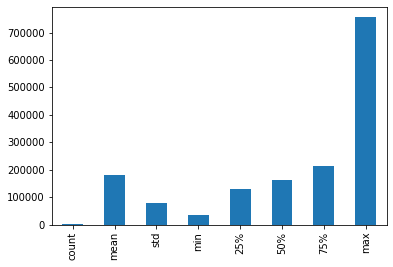

In [278]:
hdata['SalePrice'].describe().plot.bar()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


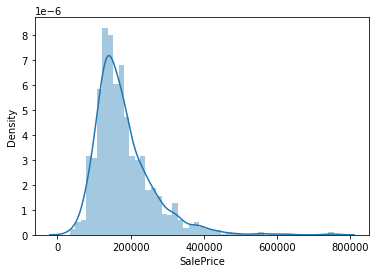

In [279]:
sns.distplot(hdata['SalePrice'])

In [280]:
# Skewness
hdata['SalePrice'].skew()

1.8840445160660748

### Segregate the numeric columns in the data to check the relationship between numeric variables

In [281]:
hdata_numeric = hdata.select_dtypes(include=['float64','int64'])
hdata_numeric.columns


Index(['MSSubClass', 'LotFrontage', 'LotArea', 'LotShape', 'LandSlope',
       'OverallQual', 'OverallCond', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'Fence',
       'MiscVal', 'SalePrice', 'HouseAge'],
      dtype='object')

In [282]:
hdata_numeric.head()

,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,Fence,MiscVal,SalePrice,HouseAge
0,60,65.0,8450,3,2,7,5,196.0,4,3,4.0,3.0,1.0,6.0,706,1.0,0,150,856,5,856,854,1710,1,0,2,1,3,1,4,8,7,0,NaN,2.0,2,548,3.0,3.0,0,61,0,0,NaN,0,208500,5
1,20,80.0,9600,3,2,6,8,0.0,3,3,4.0,3.0,4.0,5.0,978,1.0,0,284,1262,5,1262,0,1262,0,1,2,0,3,1,3,6,7,1,3.0,2.0,2,460,3.0,3.0,298,0,0,0,NaN,0,181500,31
2,60,68.0,11250,2,2,7,5,162.0,4,3,4.0,3.0,2.0,6.0,486,1.0,0,434,920,5,920,866,1786,1,0,2,1,3,1,4,6,7,1,3.0,2.0,2,608,3.0,3.0,0,42,0,0,NaN,0,223500,7
3,70,60.0,9550,2,2,7,5,0.0,3,3,3.0,4.0,1.0,5.0,216,1.0,0,540,756,4,961,756,1717,1,0,1,0,3,1,4,7,7,1,4.0,1.0,3,642,3.0,3.0,0,35,272,0,NaN,0,140000,91
4,60,84.0,14260,2,2,8,5,350.0,4,3,4.0,3.0,3.0,6.0,655,1.0,0,490,1145,5,1145,1053,2198,1,0,2,1,4,1,4,9,7,1,3.0,2.0,3,836,3.0,3.0,192,84,0,0,NaN,0,250000,8


In [283]:
#hdata_numeric.to_csv('Test123.csv')

In [284]:
hdata_numeric.corr()

,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,Fence,MiscVal,SalePrice,HouseAge
MSSubClass,1.000000,-0.354975,-0.138054,0.117361,0.025999,0.034491,-0.061330,0.022936,0.018642,-0.065105,0.081896,-0.003065,0.058882,0.032627,-0.069575,-0.023070,-0.066137,-0.138922,-0.236906,-0.019697,-0.250050,0.308104,0.076930,0.003807,-0.002633,0.136306,0.176165,-0.021651,0.286572,-0.011538,0.042406,-0.010147,-0.044466,-0.035311,0.008433,-0.039043,-0.098141,0.023988,-0.029703,-0.012634,-0.005462,-0.010571,-0.026414,0.157799,-0.007805,-0.082813,-0.029298
LotFrontage,-0.354975,1.000000,0.304684,-0.194620,-0.065929,0.233147,-0.053072,0.179459,0.164054,-0.016299,0.160809,0.041299,0.157768,0.068843,0.215610,0.013095,0.042781,0.121872,0.362862,0.089776,0.414458,0.073386,0.368004,0.091245,-0.006822,0.179172,0.047926,0.236915,-0.004674,0.168420,0.320213,0.023176,0.233661,0.088122,0.200659,0.268705,0.323132,0.052057,0.037656,0.074498,0.134672,0.010692,0.037946,0.015929,-0.000192,0.333184,-0.115916
LotArea,-0.138054,0.304684,1.000000,-0.315423,-0.437985,0.106324,-0.002269,0.104160,0.054555,0.014991,0.079644,0.027475,0.233090,0.057061,0.213063,0.085050,0.111686,-0.004227,0.258409,0.005925,0.295919,0.052935,0.261159,0.157702,0.048377,0.122457,0.016290,0.117778,-0.024697,0.069446,0.187990,-0.016460,0.269643,0.039357,0.103348,0.154739,0.180778,0.028712,0.018781,0.173167,0.086301,-0.023094,0.043511,0.089827,0.038226,0.264674,-0.016184
LotShape,0.117361,-0.194620,-0.315423,1.000000,0.144179,-0.202670,0.032976,-0.089178,-0.192444,-0.013742,-0.224699,-0.099978,-0.176247,-0.098491,-0.157523,-0.048488,-0.060104,-0.014995,-0.201040,-0.122846,-0.188954,-0.091771,-0.213837,-0.064746,-0.057476,-0.186458,-0.118463,-0.060879,0.099162,-0.161579,-0.137987,-0.028341,-0.202719,-0.003173,-0.230293,-0.196663,-0.175069,-0.095891,-0.078091,-0.163184,-0.096309,0.098392,-0.064902,-0.121318,-0.028556,-0.271627,0.234388
LandSlope,0.025999,-0.065929,-0.437985,0.144179,1.000000,0.065685,-0.009596,0.021815,0.085416,0.039918,0.025909,-0.018024,-0.266589,-0.048031,-0.115179,-0.073502,-0.085191,0.116650,-0.033454,0.056804,-0.069597,0.009261,-0.044566,-0.117310,-0.070020,0.046144,-0.001384,0.048571,0.036267,0.038682,0.033770,0.096910,-0.124860,0.020420,0.023065,0.002090,-0.005367,-0.011788,0.019524,-0.095079,0.031894,0.008811,-0.052658,0.032868,0.003628,-0.052276,-0.072524
OverallQual,0.034491,0.233147,0.106324,-0.202670,0.065685,1.000000,-0.090628,0.411876,0.724839,0.015107,0.663183,0.171974,0.260221,0.186067,0.236823,-0.094722,-0.058039,0.309602,0.537122,0.455802,0.476936,0.298543,0.594417,0.108505,-0.039207,0.552266,0.271466,0.105900,-0.184642,0.671682,0.430549,0.146338,0.400398,0.353953,0.518864,0.599734,0.560543,0.144086,0.127755,0.240652,0.303482,-0.112950,0.066403,0.339401,-0.031129,0.789997,-0.571304
OverallCond,-0.061330,-0.053072,-0.002269,0.032976,-0.009596,-0.090628,1.000000,-0.128101,-0.135729,0.389349,-0.290766,0.122128,-0.083404,-0.037904,-0.041927,0.085032,0.039333,-0.136934,-0.167230,-0.014394,-0.138814,0.027473,-0.076541,-0.051567,0.117290,-0.190396,-0.061434,0.014274,-0.081254,-0.026153,-0.055964,0.111776,-0.020120,-0.021479,-0.208851,-0.184866,-0.151062,0.031925,0.025165,-0.004530,-0.031172,0.074731,0.054016,0.039340,0.068642,-0.076294,0.378069
MasVnrArea,0.022936,0.179459,0.104160,-0.089178,0.021815,0.411876,-0.128101,1.000000,0.351524,-0.018834,0.316953,0.044282,0.166601,0.178136,0.264736,-0.060520,-0.072319,0.114442,0.363936,0.159639,0.344501,0.174561,0.390857,0.085310,0.026673,0.276833,0.201444,0.102821,-0.037610,0.286064,0.280682,0.082074,

Segregate the Categorical columns in the data to check the relationship between categorical variables

Then create Dummy variables for each of them

In [285]:
# Seperating the Categorical columns from the data
hdata_categorical = hdata.select_dtypes(include=['object'])
hdata_categorical.columns

Index(['MSZoning', 'Alley', 'LandContour', 'LotConfig', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'CentralAir',
       'Electrical', 'GarageType', 'PavedDrive', 'MiscFeature', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [286]:
# Convert into dummies
hdata_dummies = pd.get_dummies(hdata_categorical, drop_first=True)
hdata_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_No Alley,Alley_Pave,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,...,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,PavedDrive_P,PavedDrive_Y,MiscFeature_No MiscFeature,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,...,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [287]:
#Dropping the columns for which we have dummy values.
hdata = hdata.drop(list(hdata_categorical.columns), axis=1)
hdata.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'LotShape', 'LandSlope',
       'OverallQual', 'OverallCond', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'Fence',
       'MiscVal', 'SalePrice', 'HouseAge'],
      dtype='object')

## Join the Categorical and Numeric dataframes into one for further analysis

In [288]:
hdataFinal = pd.concat([hdata, hdata_dummies], axis=1)

In [289]:
hdataFinal.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'LotShape', 'LandSlope',
       'OverallQual', 'OverallCond', 'MasVnrArea', 'ExterQual', 'ExterCond',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=182)

### STEP 3: Preparing the data for modelling
TRAIN TEST SPLIT 80:20 strategy

In [290]:
#X_train = hdataFinal.drop("SalePrice", axis=1)

In [291]:
hdataFinal = hdataFinal.fillna(0)

In [292]:
# Import library
from sklearn.model_selection import train_test_split

# Splitting data into train and test set with 80:20 ratio
df_train, df_test = train_test_split(hdataFinal, train_size=0.8, test_size=0.2, random_state=100)


In [293]:
print(df_train.shape)
print(df_test.shape)

(1161, 182)
(291, 182)


Feature Scaling for the model

In [294]:
# Normalization method
from sklearn.preprocessing import MinMaxScaler

# Instantiate the scaler
scaler = MinMaxScaler()

In [295]:
# Scaling only the numeric variables for the model. Binary variables are already scaled into 0 and 1.
# Numeric columns list
numeric_cols = list(df_train.select_dtypes(include=['int64', 'float64']).columns)
# Fit the data for the model
df_train[numeric_cols] = scaler.fit_transform(df_train[numeric_cols])
df_train.head()

,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,...,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,PavedDrive_P,PavedDrive_Y,MiscFeature_No MiscFeature,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
744,0.588235,0.068493,0.019140,0.666667,1.0,0.777778,0.500,0.000000,0.666667,0.333333,0.8,0.75,0.25,1.000000,0.129872,0.166667,0.000000,0.258562,0.218822,0.75,0.230151,0.000000,0.188960,0.333333,0.0,0.666667,0.0,0.250,0.333333,0.666667,0.250000,1.0,0.333333,0.6,0.666667,0.50,0.325811,0.6,0.6,0.112019,...,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1184,0.000000,0.099315,0.158139,1.000000,0.5,0.444444,0.375,0.141250,0.333333,0.333333,0.6,0.75,1.00,0.500000,0.205351,0.166667,0.000000,0.176798,0.257283,0.75,0.284075,0.000000,0.233233,0.333333,0.0,0.333333,0.5,0.375,0.333333,0.333333,0.250000,1.0,0.666667,0.6,0.666667,0.75,0.701693,0.6,0.6,0.000000,...,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
369,0.000000,0.164384,0.039870,0.666667,1.0,0.444444,0.750,0.000000,0.333333,0.666667,0.6,0.75,0.25,0.833333,0.012757,0.500000,0.228926,0.313784,0.173977,1.00,0.218678,0.000000,0.179540,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.666667,0.416667,1.0,0.333333,0.8,1.000000,0.50,0.406206,0.6,0.6,0.424737,...,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
627,0.352941,0.202055,0.038795,1.000000,1.0,0.555556,0.625,0.102500,0.333333,0.333333,0.6,0.75,0.75,0.666667,0.119419,0.333333,0.117125,0.149829,0.189198,1.00,0.272143,0.000000,0.223436,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.333333,0.416667,1.0,0.666667,0.8,0.666667,0.25,0.256700,0.6,0.6,0.000000,...,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
517,0.235294,0.198630,0.041637,0.666667,1.0,0.666667,0.500,0.575625,0.666667,0.333333,0.8,0.75,0.25,0.166667,0.000000,0.166667,0.000000,0.541096,0.206874,1.00,0.216384,0.516707,0.378674,0.000000,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.416667,1.0,0.333333,0.6,0.666667,0.75,0.626939,0.6,0.6,0.256709,...,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [296]:
df_train.shape

(1161, 182)

In [297]:
# Variables more than 0.7 correlations 
c = df_train.corr().abs()
s = c.unstack()
sort = s.sort_values(kind="quicksort", ascending=False)
df_corr = pd.DataFrame(sort)
#df_corr.columns = ['correlations']
print(df_corr[(df_corr[0] < 1) & (df_corr[0] > 0.7)])

                                                              0
SaleType_New               SaleCondition_Partial       0.988491
SaleCondition_Partial      SaleType_New                0.988491
Exterior1st_CemntBd        Exterior2nd_CmentBd         0.979868
Exterior2nd_CmentBd        Exterior1st_CemntBd         0.979868
Exterior2nd_VinylSd        Exterior1st_VinylSd         0.979074
Exterior1st_VinylSd        Exterior2nd_VinylSd         0.979074
Exterior1st_MetalSd        Exterior2nd_MetalSd         0.970070
Exterior2nd_MetalSd        Exterior1st_MetalSd         0.970070
GarageQual                 GarageCond                  0.966493
GarageCond                 GarageQual                  0.966493
MiscFeature_Shed           MiscFeature_No MiscFeature  0.952815
MiscFeature_No MiscFeature MiscFeature_Shed            0.952815
GarageType_No Garage       GarageCond                  0.948142
GarageCond                 GarageType_No Garage        0.948142
GarageType_No Garage       GarageQual   

In [298]:
# We can drop one of the highly correlated variables from the above list as they are directly correlated

df_train = df_train.drop(['SaleCondition_Partial','Exterior1st_CemntBd','Exterior2nd_VinylSd','Exterior2nd_MetalSd','MiscFeature_Shed','RoofStyle_Gable','GarageCars','Exterior2nd_HdBoard','Exterior1st_Wd Sdng','Neighborhood_Somerst','GrLivArea','1stFlrSF','MSZoning_RL','BsmtFinType2','2ndFlrSF','MasVnrType_BrkFace','Exterior2nd_Stucco','Foundation_PConc','HouseStyle_1Story','Exterior2nd_Plywood','SaleType_New','SaleType_WD','HouseAge','OverallQual','RoofStyle_Shed','KitchenQual','GarageType_Detchd'], axis=1)

In [299]:
df_train.shape

(1161, 155)

In [300]:
y_train = df_train.pop('SalePrice')

# Creating X_train
X_train = df_train

In [301]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageFinish,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,Fence,MiscVal,MSZoning_FV,MSZoning_RH,...,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_ImStucc,Exterior2nd_Other,Exterior2nd_Stone,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_Slab,Foundation_Stone,Foundation_Wood,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_No Garage,PavedDrive_P,PavedDrive_Y,MiscFeature_No MiscFeature,MiscFeature_Othr,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_Oth,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal
744,0.588235,0.068493,0.019140,0.666667,1.0,0.500,0.000000,0.666667,0.333333,0.8,0.75,0.25,1.000000,0.129872,0.000000,0.258562,0.218822,0.75,0.333333,0.0,0.666667,0.0,0.250,0.333333,0.250000,1.0,0.333333,0.6,0.666667,0.325811,0.6,0.6,0.112019,0.000000,0.126812,0.000000,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1
1184,0.000000,0.099315,0.158139,1.000000,0.5,0.375,0.141250,0.333333,0.333333,0.6,0.75,1.00,0.500000,0.205351,0.000000,0.176798,0.257283,0.75,0.333333,0.0,0.333333,0.5,0.375,0.333333,0.250000,1.0,0.666667,0.6,0.666667,0.701693,0.6,0.6,0.000000,0.502868,0.000000,0.597727,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1
369,0.000000,0.164384,0.039870,0.666667,1.0,0.750,0.000000,0.333333,0.666667,0.6,0.75,0.25,0.833333,0.012757,0.228926,0.313784,0.173977,1.00,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.416667,1.0,0.333333,0.8,1.000000,0.406206,0.6,0.6,0.424737,0.032505,0.000000,0.413636,0.0,0.0,0,0,...,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1
627,0.352941,0.202055,0.038795,1.000000,1.0,0.625,0.102500,0.333333,0.333333,0.6,0.75,0.75,0.666667,0.119419,0.117125,0.149829,0.189198,1.00,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.416667,1.0,0.666667,0.8,0.666667,0.256700,0.6,0.6,0.000000,0.000000,0.342391,0.000000,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1
517,0.235294,0.198630,0.041637,0.666667,1.0,0.500,0.575625,0.666667,0.333333,0.8,0.75,0.25,0.166667,0.000000,0.000000,0.541096,0.206874,1.00,0.000000,0.0,0.666667,0.5,0.375,0.333333,0.416667,1.0,0.333333,0.6,0.666667,0.626939,0.6,0.6,0.256709,0.000000,0.000000,0.000000,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1


In [302]:
y_train.head()


744     0.204337
1184    0.213773
369     0.178989
627     0.166315
517     0.324039
Name: SalePrice, dtype: float64

In [303]:
print(X_train.shape)
print(y_train.shape)

(1161, 154)
(1161,)


In [304]:
# Scale the test set variables with min-max scaler
# Only transform the test set. 
df_test[numeric_cols] = scaler.transform(df_test[numeric_cols]) 
df_test.head()

,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,...,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,PavedDrive_P,PavedDrive_Y,MiscFeature_No MiscFeature,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
157,0.235294,0.243151,0.050027,1.0,1.0,0.777778,0.500,0.052500,0.666667,0.333333,1.0,0.75,0.25,0.166667,0.000000,0.166667,0.0,0.331336,0.126678,1.0,0.100964,0.578208,0.307837,0.000000,0.0,0.666667,0.5,0.500,0.333333,1.000000,0.500000,1.000000,0.333333,0.8,1.000000,0.75,0.479549,0.6,0.6,0.000000,...,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
337,0.000000,0.167808,0.036622,1.0,1.0,0.666667,0.500,0.070625,0.666667,0.333333,0.8,0.75,0.75,1.000000,0.143515,0.166667,0.0,0.310788,0.251391,1.0,0.275815,0.000000,0.226451,0.333333,0.0,0.666667,0.0,0.375,0.333333,0.666667,0.416667,1.000000,0.000000,0.0,0.666667,0.50,0.375176,0.6,0.6,0.224037,...,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1120,0.058824,0.130137,0.032546,1.0,0.5,0.555556,0.500,0.000000,0.333333,0.333333,0.6,0.75,0.25,0.166667,0.000000,0.166667,0.0,0.433219,0.165630,0.5,0.155576,0.000000,0.127732,0.000000,0.0,0.333333,0.0,0.250,0.333333,0.333333,0.333333,1.000000,0.333333,0.8,0.333333,0.25,0.217207,0.6,0.6,0.000000,...,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
563,0.176471,0.154110,0.095726,1.0,1.0,0.555556,0.750,0.000000,0.333333,0.333333,0.8,0.75,0.50,0.166667,0.000000,0.166667,0.0,0.497860,0.190344,1.0,0.190225,0.247458,0.252449,0.000000,0.0,0.666667,0.0,0.500,0.333333,0.333333,0.500000,1.000000,0.333333,0.8,1.000000,0.50,0.279267,0.6,0.6,0.084014,...,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
371,0.176471,0.202055,0.073944,1.0,1.0,0.333333,0.375,0.000000,0.333333,0.333333,0.0,0.00,0.00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.5,0.180358,0.226634,0.236247,0.000000,0.0,0.666667,0.0,0.500,0.333333,0.333333,0.416667,0.666667,0.333333,0.8,1.000000,0.50,0.479549,0.6,0.6,0.000000,...,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


Creating the XTest and yTest dfs

In [305]:
# popping out the SalePrice column to create y_test
y_test = df_test.pop('SalePrice')
# Creating X_test
X_test = df_test

In [306]:
# Retaining the columns of X_train to X_test
X_test = X_test[X_train.columns]
X_test.head()

,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageFinish,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,Fence,MiscVal,MSZoning_FV,MSZoning_RH,...,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_ImStucc,Exterior2nd_Other,Exterior2nd_Stone,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_Slab,Foundation_Stone,Foundation_Wood,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_No Garage,PavedDrive_P,PavedDrive_Y,MiscFeature_No MiscFeature,MiscFeature_Othr,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_Oth,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal
157,0.235294,0.243151,0.050027,1.0,1.0,0.500,0.052500,0.666667,0.333333,1.0,0.75,0.25,0.166667,0.000000,0.0,0.331336,0.126678,1.0,0.000000,0.0,0.666667,0.5,0.500,0.333333,0.500000,1.000000,0.333333,0.8,1.000000,0.479549,0.6,0.6,0.000000,0.143403,0.000000,0.000000,0.00,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
337,0.000000,0.167808,0.036622,1.0,1.0,0.500,0.070625,0.666667,0.333333,0.8,0.75,0.75,1.000000,0.143515,0.0,0.310788,0.251391,1.0,0.333333,0.0,0.666667,0.0,0.375,0.333333,0.416667,1.000000,0.000000,0.0,0.666667,0.375176,0.6,0.6,0.224037,0.141491,0.000000,0.000000,0.00,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1
1120,0.058824,0.130137,0.032546,1.0,0.5,0.500,0.000000,0.333333,0.333333,0.6,0.75,0.25,0.166667,0.000000,0.0,0.433219,0.165630,0.5,0.000000,0.0,0.333333,0.0,0.250,0.333333,0.333333,1.000000,0.333333,0.8,0.333333,0.217207,0.6,0.6,0.000000,0.042065,0.202899,0.000000,0.75,0.0,0,0,...,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1
563,0.176471,0.154110,0.095726,1.0,1.0,0.750,0.000000,0.333333,0.333333,0.8,0.75,0.50,0.166667,0.000000,0.0,0.497860,0.190344,1.0,0.000000,0.0,0.666667,0.0,0.500,0.333333,0.500000,1.000000,0.333333,0.8,1.000000,0.279267,0.6,0.6,0.084014,0.068834,0.000000,0.327273,0.00,0.0,0,0,...,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
371,0.176471,0.202055,0.073944,1.0,1.0,0.375,0.000000,0.333333,0.333333,0.0,0.00,0.00,0.000000,0.000000,0.0,0.000000,0.000000,0.5,0.000000,0.0,0.666667,0.0,0.500,0.333333,0.416667,0.666667,0.333333,0.8,1.000000,0.479549,0.6,0.6,0.000000,0.112811,0.000000,0.000000,0.00,0.0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [307]:
print(X_test.shape)
print(y_test.shape)
y_test.head()

(291, 154)
(291,)


157     0.330376
337     0.252218
1120    0.117589
563     0.211379
371     0.140166
Name: SalePrice, dtype: float64

## STEP4: Building the Model

1. Normal Model
2. Rigid regularization applied
3. Lasso regularization applied


In [308]:
# Building the regular model (NO REGULARIZATION)

In [309]:
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics

In [310]:
# Instantiate the linear regression
lm = LinearRegression()
# Fit the model with train set
lm.fit(X_train, y_train)

LinearRegression()

In [311]:
# Predict the model with train set
y_train_pred = lm.predict(X_train)
# r2 score for the train model
metrics.r2_score(y_true = y_train, y_pred = y_train_pred)
y_train_pred

array([0.27393901, 0.26721932, 0.20079678, ..., 0.23529939, 0.12115322,
       0.20152727])

In [312]:
# Fit the model with test set
y_test_pred = lm.predict(X_test)
y_test_list = []
# for i in range(len(y_test_pred)):
#   y_test_list.append(round(y_test_pred[i],7))

# r2 score for the test set
metrics.r2_score(y_true = y_test, y_pred = y_test_pred)


-99901089.97111316

In [313]:
# Model parameters coefficients
model_parameters = lm.coef_
# model coefficients
cols = X_train.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', -0.021883518615585545),
 ('MSSubClass', -0.005954424584256608),
 ('LotFrontage', 0.10320451925381362),
 ('LotArea', 0.01082310470647467),
 ('LotShape', -0.009850217049800408),
 ('LandSlope', 0.06761448737898229),
 ('OverallCond', 0.06887271468027364),
 ('MasVnrArea', 0.05205836952128859),
 ('ExterQual', -0.002137135455940596),
 ('ExterCond', 0.08592412394797569),
 ('BsmtQual', -0.053892730298070915),
 ('BsmtCond', 0.0358199100046306),
 ('BsmtExposure', 0.02023655231921931),
 ('BsmtFinType1', 280221013871.98096),
 ('BsmtFinSF1', 55954833918.09318),
 ('BsmtFinSF2', 115980915734.4029),
 ('BsmtUnfSF', -303357617781.18964),
 ('TotalBsmtSF', 0.011405264208146332),
 ('HeatingQC', 0.037875385123178146),
 ('BsmtFullBath', -0.0026413164720793594),
 ('BsmtHalfBath', 0.07879422689654085),
 ('FullBath', 0.03961123227823059),
 ('HalfBath', -0.04799284147927798),
 ('BedroomAbvGr', -0.07576471694914821),
 ('KitchenAbvGr', 0.16046228338806573),
 ('TotRmsAbvGrd', 0.04479658613319906),
 ('F

## STEP5 : Tuning model with Regularization

Ridge Regression

In [314]:
# Import Ridge regression module, Grid Serach CV and KFold
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

In [315]:
# Specify the range of hyperparameters (alpha)
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]}

# Instantiate Ridge regression
ridge = Ridge()

In [316]:
# Cross validation with 5 folds
folds = 5
model_cv = GridSearchCV(estimator=ridge,
                       param_grid=params,
                       scoring='r2',
                       cv=folds,
                       return_train_score=True,
                       verbose=1)
# Fitting the model with train set
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 23 candidates, totalling 115 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [317]:
# creating dataframe with model_ridge results
ridge_results = pd.DataFrame(model_cv.cv_results_)
ridge_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.011317,0.001076,0.007684,0.003198,0.0001,{'alpha': 0.0001},0.544844,0.758654,0.846702,0.835507,0.827422,0.762626,0.113158,23,0.908633,0.870052,0.858550,0.864089,0.865273,0.873319,0.018032
1,0.018632,0.005324,0.006445,0.002331,0.001,{'alpha': 0.001},0.545735,0.758693,0.846809,0.835517,0.827426,0.762836,0.112833,22,0.908633,0.870052,0.858550,0.864089,0.865273,0.873319,0.018032
2,0.015744,0.008825,0.007490,0.003797,0.01,{'alpha': 0.01},0.551854,0.759061,0.847788,0.835616,0.827464,0.764357,0.110641,21,0.908625,0.870052,0.858544,0.864088,0.865273,0.873316,0.018030
3,0.018984,0.006333,0.008437,0.002538,0.05,{'alpha': 0.05},0.567329,0.760456,0.850777,0.836002,0.827627,0.768438,0.105220,20,0.908504,0.870035,0.858458,0.864067,0.865256,0.873264,0.018001
4,0.023753,0.000761,0.010326,0.000408,0.1,{'alpha': 0.1},0.581964,0.761899,0.853024,0.836396,0.827812,0.772219,0.100042,19,0.908220,0.869992,0.858307,0.864014,0.865211,0.873149,0.017926


In [318]:
#Plotting the mean of the train and test results
# Converting the 'param_alpha' datatype from object to int
ridge_results['param_alpha'] = ridge_results['param_alpha'].astype('int32')

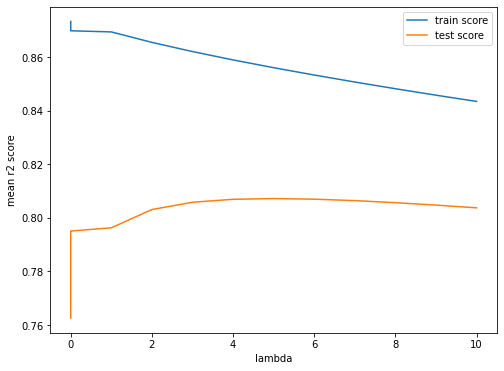

In [319]:
# Plotting mean of Train score
plt.figure(figsize=(8,6))
plt.plot(ridge_results['param_alpha'], ridge_results['mean_train_score'])
# Plotting mean of the Test score
plt.plot(ridge_results['param_alpha'], ridge_results['mean_test_score'])
plt.legend(['train score', 'test score'])
plt.xlabel('lambda')
plt.ylabel('mean r2 score')
plt.show()

Analysis of the above graph
Train Score

As a general trend as the Lambda value increases, the r2 score decreases. which indicates that the error increases. Because the model tends to underfit and more generalised. 
Thus by increasing the Lambda the model becomes more simple.

Test Score
With the very low value of Lambda, the error is high as we can see the r2 value decreased. But the error for the train set is low. It means that the model is becomes overfitted with very low value of Lambda.
With the increasing value of Lambda, the error started decreasing more and it reached to a peak at lambda=4. Here, the error is least and accuracy (r2 score) is the highest.
After Lambda=4, the r2 score started decreasing as the Lambda is increasing. Hence, the model accuracy started dipping.
We need to pick the value of aplha for which the test score peaks up. In this case in Lambda=4, the error is least in the test set and hence the accuracy is around 80.5%.

So, the optimum Lambda will be 4, for which we will have a right balance between the error and the generalization of the model for creating a simpler model.

### Ridge regression with optimal Lambda = 4

In [320]:
# Instantiate Ridge regression with lambda=4
model_ridge = Ridge(alpha=4)
# Fitting the model with the train set
model_ridge.fit(X_train, y_train)

Ridge(alpha=4)

## Model evaluation Ridge Regression

Model performance on the train set

In [321]:
y_train_pred = model_ridge.predict(X_train)
print(metrics.r2_score(y_true = y_train, y_pred = y_train_pred))

0.8550890639310231


Model performance on the test set

In [322]:
y_test_pred = model_ridge.predict(X_test)
print(metrics.r2_score(y_true = y_test, y_pred = y_test_pred))

0.8010372887235666


### Conclusion

We have a good train score 85.5 % and Decent score of 80.1 %. That means what the model learnt in the train set it performed reasonably well in the test set. However the test score can be improved. 

Ridge Regression Model Parameters

In [323]:
# Coefficients list
model_ridge_parameters = list(model_ridge.coef_)
# Inserting Y Intercept to model parameters list
model_ridge_parameters.insert(0, model_ridge.intercept_)
# Rounding off the coefficients
model_ridge_parameters = [round(i,3) for i in model_ridge_parameters]

cols = X_train.columns
cols = cols.insert(0,'constant')
ridge_param_list = list(zip(cols, model_ridge_parameters))
ridge_param_list

[('constant', -0.129),
 ('MSSubClass', -0.027),
 ('LotFrontage', 0.013),
 ('LotArea', 0.035),
 ('LotShape', 0.002),
 ('LandSlope', -0.01),
 ('OverallCond', 0.052),
 ('MasVnrArea', 0.051),
 ('ExterQual', 0.061),
 ('ExterCond', 0.003),
 ('BsmtQual', 0.061),
 ('BsmtCond', -0.03),
 ('BsmtExposure', 0.04),
 ('BsmtFinType1', 0.022),
 ('BsmtFinSF1', 0.037),
 ('BsmtFinSF2', 0.009),
 ('BsmtUnfSF', 0.025),
 ('TotalBsmtSF', 0.045),
 ('HeatingQC', 0.013),
 ('BsmtFullBath', 0.037),
 ('BsmtHalfBath', -0.005),
 ('FullBath', 0.075),
 ('HalfBath', 0.036),
 ('BedroomAbvGr', -0.004),
 ('KitchenAbvGr', -0.02),
 ('TotRmsAbvGrd', 0.103),
 ('Functional', 0.032),
 ('Fireplaces', 0.03),
 ('FireplaceQu', 0.009),
 ('GarageFinish', 0.018),
 ('GarageArea', 0.07),
 ('GarageQual', 0.011),
 ('GarageCond', -0.002),
 ('WoodDeckSF', 0.022),
 ('OpenPorchSF', 0.004),
 ('EnclosedPorch', 0.007),
 ('ScreenPorch', 0.007),
 ('Fence', 0.004),
 ('MiscVal', -0.001),
 ('MSZoning_FV', 0.011),
 ('MSZoning_RH', -0.0),
 ('MSZoning_RM'

Top 10 features of Ridge regression

In [324]:
ridge_params_df = pd.DataFrame({'Params':cols, 'Coef':model_ridge_parameters})
(ridge_params_df.sort_values('Coef', ascending=False)).head(11)

,Params,Coef
25,TotRmsAbvGrd,0.103
71,Neighborhood_StoneBr,0.075
21,FullBath,0.075
30,GarageArea,0.070
65,Neighborhood_NoRidge,0.070
8,ExterQual,0.061
10,BsmtQual,0.061
66,Neighborhood_NridgHt,0.057
6,OverallCond,0.052
7,MasVnrArea,0.051


## Lasso Regression

In [325]:
# Importing Lasso module
from sklearn.linear_model import Lasso

In [326]:
params = {'alpha': [0.000001,0.00001,0.0001,0.001, 0.01, 1.0,2]}

In [327]:
# Instantiate Lasso regression
lasso = Lasso()

In [328]:
# Cross validation with 5 folds
model_cv = GridSearchCV(estimator=lasso,
                       param_grid=params,
                       scoring='r2',
                       cv=folds,
                       return_train_score=True,
                       verbose=1)
# Fitting the model with train set
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 1.0, 2]},
             return_train_score=True, scoring='r2', verbose=1)

In [329]:
# creating dataframe with model_cv results
lasso_results = pd.DataFrame(model_cv.cv_results_)
lasso_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.133488,0.028258,0.005486,0.000201,1e-06,{'alpha': 1e-06},0.550347,0.759344,0.847814,0.835808,0.827672,0.764197,0.111270,4,0.908622,0.870048,0.858540,0.864086,0.865270,0.873313,0.018030
1,0.045782,0.015541,0.006612,0.001970,1e-05,{'alpha': 1e-05},0.562942,0.763937,0.853977,0.838007,0.829284,0.769629,0.107797,3,0.908309,0.869687,0.858148,0.863806,0.864976,0.872985,0.018040
2,0.031303,0.007440,0.010447,0.002954,0.0001,{'alpha': 0.0001},0.644451,0.787774,0.867959,0.841742,0.825442,0.793474,0.078918,1,0.898108,0.861769,0.848320,0.855216,0.856095,0.863902,0.017628
3,0.025228,0.002034,0.012630,0.004579,0.001,{'alpha': 0.001},0.728845,0.790026,0.828410,0.787258,0.739768,0.774862,0.036332,2,0.812646,0.795642,0.781647,0.790815,0.789769,0.794104,0.010305
4,0.016736,0.003916,0.005965,0.001654,0.01,{'alpha': 0.01},0.324843,0.396603,0.359200,0.354283,0.319811,0.350948,0.027621,5,0.355924,0.361843,0.337439,0.371200,0.376076,0.360496,0.013503


Plotting the mean of the train and test results

In [330]:
# Converting the 'param_alpha' datatype from object to int
lasso_results['param_alpha'] = lasso_results['param_alpha'].astype('int32')

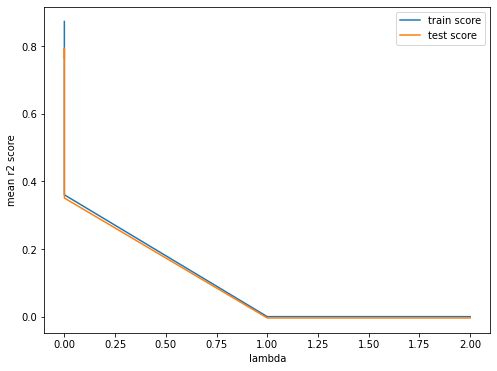

In [331]:
# Plotting mean of Train score
plt.figure(figsize=(8,6))
plt.plot(lasso_results['param_alpha'], lasso_results['mean_train_score'])
# Plotting mean of the Test score
plt.plot(lasso_results['param_alpha'], lasso_results['mean_test_score'])

plt.legend(['train score', 'test score'])
plt.xlabel('lambda')
plt.ylabel('mean r2 score')
plt.show()

Analysis of the above graph

From the above graph we can analyse that with very lower value of alpha (~ 0.01 - 0.02), the accuracy of the train and test set is the highest.

**Train Score**

As the alpha (lambda) increases, the r2 score decreases. That means the error increases at a large pace. Because the model tends to get underfit and more generalised. At 0.002 (close to 0) the train set accury is highest(Approx 85%).

**Test Score**

At alpha = 0.002 the test accuracy is highest (Approx 80%).
After alpha=0.002, the r2 score starts to decrease as the alpha is increasing. Hence, the model accuracy started to dip.
To pick the optimum alpha / lambda value, In this case at alpha=0.002, the error is least in the test set and hence the accuracy is around 80%.

So, the optimum alpha will be 0.002, for which we will have a right balance between the error and the generalisation of the model for creating a good model.

Lasso regression with optimal alpha 0.002

In [332]:
# Instantiate Lasso regression with alpha=0.002
model_lasso = Lasso(0.002)
# Fitting the model with the train set
model_lasso.fit(X_train, y_train)

Lasso(alpha=0.002)

### Model evaluation Lasso Regression

Model performance on the train set

In [333]:
y_train_pred = model_lasso.predict(X_train)
print(metrics.r2_score(y_true = y_train, y_pred = y_train_pred))

0.7377309696588372


In [334]:
# Model performance on the test set

y_test_pred = model_lasso.predict(X_test)
print(metrics.r2_score(y_true = y_test, y_pred = y_test_pred))

0.6977789541026451


Conclusion
We have train set accuracy 73.77% whereas test set accuracy is 69.77%. Considering both scores, we can conclude that what the model learnt on the train set, it performed well on the test set as well. 

However in contrast to Lasso regularization, RIDGE regularization performed much better on both training and Test scores.

In [335]:
# Coefficients list
model_lasso_parameters = list(model_lasso.coef_)
# Inserting Y Intercept to model parameters list
model_lasso_parameters.insert(0, model_lasso.intercept_)
# Rounding off the coefficients
model_lasso_parameters = [round(i,3) for i in model_lasso_parameters]

cols = X_train.columns
cols = cols.insert(0,'constant')
lasso_param_list = list(zip(cols, model_lasso_parameters))
lasso_param_list

[('constant', -0.016),
 ('MSSubClass', -0.005),
 ('LotFrontage', 0.0),
 ('LotArea', 0.0),
 ('LotShape', -0.0),
 ('LandSlope', -0.0),
 ('OverallCond', 0.0),
 ('MasVnrArea', 0.0),
 ('ExterQual', 0.113),
 ('ExterCond', 0.0),
 ('BsmtQual', 0.032),
 ('BsmtCond', 0.0),
 ('BsmtExposure', 0.039),
 ('BsmtFinType1', 0.023),
 ('BsmtFinSF1', 0.0),
 ('BsmtFinSF2', 0.0),
 ('BsmtUnfSF', 0.0),
 ('TotalBsmtSF', 0.0),
 ('HeatingQC', 0.004),
 ('BsmtFullBath', 0.0),
 ('BsmtHalfBath', -0.0),
 ('FullBath', 0.053),
 ('HalfBath', 0.008),
 ('BedroomAbvGr', 0.0),
 ('KitchenAbvGr', -0.0),
 ('TotRmsAbvGrd', 0.073),
 ('Functional', 0.0),
 ('Fireplaces', 0.0),
 ('FireplaceQu', 0.051),
 ('GarageFinish', 0.025),
 ('GarageArea', 0.069),
 ('GarageQual', 0.0),
 ('GarageCond', 0.0),
 ('WoodDeckSF', 0.0),
 ('OpenPorchSF', 0.0),
 ('EnclosedPorch', 0.0),
 ('ScreenPorch', 0.0),
 ('Fence', -0.0),
 ('MiscVal', -0.0),
 ('MSZoning_FV', 0.0),
 ('MSZoning_RH', -0.0),
 ('MSZoning_RM', -0.012),
 ('Alley_No Alley', 0.0),
 ('Alley_Pav

In [336]:
# Features by Lasso regularization

# Parameters having coefficients greater than 1
lasso_params_df = pd.DataFrame({'Params':cols, 'Coef':model_lasso_parameters})
lasso_params_df = lasso_params_df.loc[lasso_params_df['Coef'] != 0]
lasso_params_df

,Params,Coef
0,constant,-0.016
1,MSSubClass,-0.005
8,ExterQual,0.113
10,BsmtQual,0.032
12,BsmtExposure,0.039
13,BsmtFinType1,0.023
18,HeatingQC,0.004
21,FullBath,0.053
22,HalfBath,0.008
25,TotRmsAbvGrd,0.073


In [337]:
# Top predictors for lasso regression
# Sorting the parameters with their Coefficient values
lasso_params_df.sort_values('Coef',ascending=False)

,Params,Coef
8,ExterQual,0.113
25,TotRmsAbvGrd,0.073
30,GarageArea,0.069
21,FullBath,0.053
28,FireplaceQu,0.051
65,Neighborhood_NoRidge,0.040
12,BsmtExposure,0.039
10,BsmtQual,0.032
66,Neighborhood_NridgHt,0.031
29,GarageFinish,0.025


Q3 After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [338]:
X_train2 = X_train.drop(['ExterQual','TotRmsAbvGrd','GarageArea','FullBath','FireplaceQu'],axis=1)
X_test2 = X_test.drop(['ExterQual','TotRmsAbvGrd','GarageArea','FullBath','FireplaceQu'],axis=1)

In [339]:
X_train2.head()

,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,OverallCond,MasVnrArea,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,BsmtFullBath,BsmtHalfBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Functional,Fireplaces,GarageFinish,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,Fence,MiscVal,MSZoning_FV,MSZoning_RH,MSZoning_RM,Alley_No Alley,Alley_Pave,LandContour_HLS,LandContour_Low,...,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_ImStucc,Exterior2nd_Other,Exterior2nd_Stone,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_Slab,Foundation_Stone,Foundation_Wood,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_No Garage,PavedDrive_P,PavedDrive_Y,MiscFeature_No MiscFeature,MiscFeature_Othr,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_Oth,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal
744,0.588235,0.068493,0.019140,0.666667,1.0,0.500,0.000000,0.333333,0.8,0.75,0.25,1.000000,0.129872,0.000000,0.258562,0.218822,0.75,0.333333,0.0,0.0,0.250,0.333333,1.0,0.333333,0.666667,0.6,0.6,0.112019,0.000000,0.126812,0.000000,0.0,0.0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1
1184,0.000000,0.099315,0.158139,1.000000,0.5,0.375,0.141250,0.333333,0.6,0.75,1.00,0.500000,0.205351,0.000000,0.176798,0.257283,0.75,0.333333,0.0,0.5,0.375,0.333333,1.0,0.666667,0.666667,0.6,0.6,0.000000,0.502868,0.000000,0.597727,0.0,0.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1
369,0.000000,0.164384,0.039870,0.666667,1.0,0.750,0.000000,0.666667,0.6,0.75,0.25,0.833333,0.012757,0.228926,0.313784,0.173977,1.00,0.333333,0.0,0.0,0.375,0.333333,1.0,0.333333,1.000000,0.6,0.6,0.424737,0.032505,0.000000,0.413636,0.0,0.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1
627,0.352941,0.202055,0.038795,1.000000,1.0,0.625,0.102500,0.333333,0.6,0.75,0.75,0.666667,0.119419,0.117125,0.149829,0.189198,1.00,0.333333,0.0,0.0,0.375,0.333333,1.0,0.666667,0.666667,0.6,0.6,0.000000,0.000000,0.342391,0.000000,0.0,0.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1
517,0.235294,0.198630,0.041637,0.666667,1.0,0.500,0.575625,0.333333,0.8,0.75,0.25,0.166667,0.000000,0.000000,0.541096,0.206874,1.00,0.000000,0.0,0.5,0.375,0.333333,1.0,0.333333,0.666667,0.6,0.6,0.256709,0.000000,0.000000,0.000000,0.0,0.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1


In [340]:
X_test2.head()

,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,OverallCond,MasVnrArea,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,BsmtFullBath,BsmtHalfBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Functional,Fireplaces,GarageFinish,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,Fence,MiscVal,MSZoning_FV,MSZoning_RH,MSZoning_RM,Alley_No Alley,Alley_Pave,LandContour_HLS,LandContour_Low,...,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_ImStucc,Exterior2nd_Other,Exterior2nd_Stone,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_Slab,Foundation_Stone,Foundation_Wood,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_No Garage,PavedDrive_P,PavedDrive_Y,MiscFeature_No MiscFeature,MiscFeature_Othr,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_Oth,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal
157,0.235294,0.243151,0.050027,1.0,1.0,0.500,0.052500,0.333333,1.0,0.75,0.25,0.166667,0.000000,0.0,0.331336,0.126678,1.0,0.000000,0.0,0.5,0.500,0.333333,1.000000,0.333333,1.000000,0.6,0.6,0.000000,0.143403,0.000000,0.000000,0.00,0.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
337,0.000000,0.167808,0.036622,1.0,1.0,0.500,0.070625,0.333333,0.8,0.75,0.75,1.000000,0.143515,0.0,0.310788,0.251391,1.0,0.333333,0.0,0.0,0.375,0.333333,1.000000,0.000000,0.666667,0.6,0.6,0.224037,0.141491,0.000000,0.000000,0.00,0.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1
1120,0.058824,0.130137,0.032546,1.0,0.5,0.500,0.000000,0.333333,0.6,0.75,0.25,0.166667,0.000000,0.0,0.433219,0.165630,0.5,0.000000,0.0,0.0,0.250,0.333333,1.000000,0.333333,0.333333,0.6,0.6,0.000000,0.042065,0.202899,0.000000,0.75,0.0,0,0,1,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1
563,0.176471,0.154110,0.095726,1.0,1.0,0.750,0.000000,0.333333,0.8,0.75,0.50,0.166667,0.000000,0.0,0.497860,0.190344,1.0,0.000000,0.0,0.0,0.500,0.333333,1.000000,0.333333,1.000000,0.6,0.6,0.084014,0.068834,0.000000,0.327273,0.00,0.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
371,0.176471,0.202055,0.073944,1.0,1.0,0.375,0.000000,0.333333,0.0,0.00,0.00,0.000000,0.000000,0.0,0.000000,0.000000,0.5,0.000000,0.0,0.0,0.500,0.333333,0.666667,0.333333,1.000000,0.6,0.6,0.000000,0.112811,0.000000,0.000000,0.00,0.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [341]:
# Instantiate Lasso regression with alpha=0.002
model_lasso2 = Lasso(0.002)
# Fitting the model with the train set
model_lasso2.fit(X_train2, y_train)

Lasso(alpha=0.002)

In [342]:
y_train_pred2 = model_lasso2.predict(X_train2)
print(metrics.r2_score(y_true = y_train, y_pred = y_train_pred2))

0.6620692457003412


In [343]:
# Model performance on the test set

y_test_pred2 = model_lasso2.predict(X_test2)
print(metrics.r2_score(y_true = y_test, y_pred = y_test_pred2))

0.5732397918649441


In [344]:
# Coefficients list
model_lasso_parameters2 = list(model_lasso2.coef_)
# Inserting Y Intercept to model parameters list
model_lasso_parameters2.insert(0, model_lasso2.intercept_)
# Rounding off the coefficients
model_lasso_parameters2 = [round(i,3) for i in model_lasso_parameters2]

cols = X_train2.columns
cols = cols.insert(0,'constant')
lasso_param_list2 = list(zip(cols, model_lasso_parameters2))
lasso_param_list2

[('constant', 0.063),
 ('MSSubClass', -0.005),
 ('LotFrontage', 0.0),
 ('LotArea', 0.0),
 ('LotShape', -0.0),
 ('LandSlope', -0.0),
 ('OverallCond', 0.0),
 ('MasVnrArea', 0.0),
 ('ExterCond', 0.0),
 ('BsmtQual', 0.073),
 ('BsmtCond', 0.0),
 ('BsmtExposure', 0.039),
 ('BsmtFinType1', 0.017),
 ('BsmtFinSF1', 0.0),
 ('BsmtFinSF2', 0.0),
 ('BsmtUnfSF', 0.0),
 ('TotalBsmtSF', 0.0),
 ('HeatingQC', 0.024),
 ('BsmtFullBath', 0.0),
 ('BsmtHalfBath', -0.0),
 ('HalfBath', 0.003),
 ('BedroomAbvGr', 0.0),
 ('KitchenAbvGr', 0.0),
 ('Functional', 0.0),
 ('Fireplaces', 0.08),
 ('GarageFinish', 0.057),
 ('GarageQual', 0.0),
 ('GarageCond', 0.0),
 ('WoodDeckSF', 0.0),
 ('OpenPorchSF', 0.0),
 ('EnclosedPorch', 0.0),
 ('ScreenPorch', 0.0),
 ('Fence', -0.0),
 ('MiscVal', -0.0),
 ('MSZoning_FV', 0.0),
 ('MSZoning_RH', -0.0),
 ('MSZoning_RM', -0.024),
 ('Alley_No Alley', 0.0),
 ('Alley_Pave', 0.0),
 ('LandContour_HLS', 0.0),
 ('LandContour_Low', 0.0),
 ('LandContour_Lvl', -0.0),
 ('LotConfig_CulDSac', 0.0),


In [345]:
# Features by Lasso regularization

# Parameters having coefficients greater than 1
lasso_params_df2 = pd.DataFrame({'Params':cols, 'Coef':model_lasso_parameters2})
lasso_params_df2 = lasso_params_df2.loc[lasso_params_df2['Coef'] != 0]
lasso_params_df2

,Params,Coef
0,constant,0.063
1,MSSubClass,-0.005
9,BsmtQual,0.073
11,BsmtExposure,0.039
12,BsmtFinType1,0.017
17,HeatingQC,0.024
20,HalfBath,0.003
24,Fireplaces,0.080
25,GarageFinish,0.057
36,MSZoning_RM,-0.024


In [346]:
# Sorting the parameters with their Coefficient values
lasso_params_df2.sort_values('Coef',ascending=False)

,Params,Coef
24,Fireplaces,0.080
9,BsmtQual,0.073
0,constant,0.063
60,Neighborhood_NoRidge,0.063
61,Neighborhood_NridgHt,0.063
25,GarageFinish,0.057
11,BsmtExposure,0.039
95,RoofStyle_Hip,0.029
17,HeatingQC,0.024
120,MasVnrType_Stone,0.021
